## 노드7. 비지도학습(Unsupervised Learning)

- 차원축소
- 군집화(Clustering)

### 차원축소

- PCA(Principal Component Analysis) : 차원 축소 기법 중 대표적인 기법
    - 고차원에서 저차원으로 축소하는 선형 투영 기법

In [169]:
#라이브러리 불러오기
import pandas as pd

In [170]:
# 와인데이터 불러오기
from sklearn.datasets import load_wine
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [171]:
# 데이터 샘플 확인
print(data.shape)
data.head()

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### 스케일링

In [172]:
# 스탠다드 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
data[:3]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818]])

In [173]:
# 데이터 복사 (df변수)
df = data.copy()

### PCA

In [174]:
# 라이브러리 불러오기
from sklearn.decomposition import PCA

In [175]:
# PCA
pca = PCA(n_components = 2)   # 원하는 feature 갯수로 줄이는 방법

In [176]:
# PCA 변환
df = pca.fit_transform(df)

In [177]:
# 데이터 크기 확인
df.shape

(178, 2)

In [178]:
# 샘플 데이터 확인
df[:3]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ]])

### PCA(2차원) 시각화

In [179]:
# 시각화 라이브러리
import matplotlib.pyplot as plt

In [180]:
# 데이터 프레임 변환
df = pd.DataFrame(df)
df.head()

,0,1
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


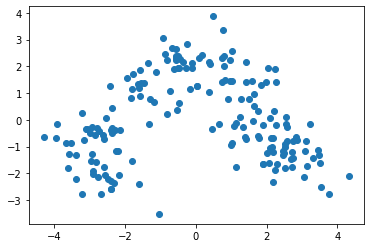

In [181]:
# scatter
plt.scatter(df.iloc[:,0], df.iloc[:,1])

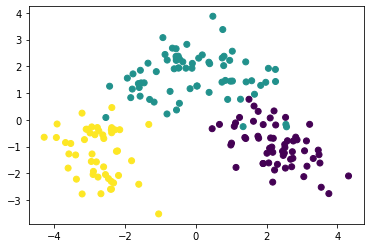

In [182]:
# scatter (c = target)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = dataset.target)

In [183]:
# 데이터 설명(%)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.36198848 0.1920749 ]
0.5540633835693534


### 지도 학습 (PCA 전후 비교)

In [184]:
# PCA후 데이터로 머신러닝 (2)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state = 2022)
cross_val_score(model, df, dataset.target, scoring = 'accuracy', cv = 5).mean()

0.9492063492063492

In [185]:
# PCA전 데이터로 머신러닝 (13)
cross_val_score(model, data, dataset.target, scoring = 'accuracy', cv = 5).mean()

0.9553968253968254

### PCA(3차원) 시각화

In [186]:
# 새 데이터 시각화
df = data.copy()

In [187]:
# pca (n_components = 3)
pca = PCA(n_components = 3)

In [188]:
# pca 변환
df = pca.fit_transform(df)

In [189]:
# 데이터 프레임 변환
df = pd.DataFrame(df)

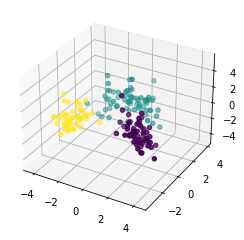

In [190]:
# 시각화 (3차원)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2], c = dataset.target)

### 점진적 PCA

- 데이터 셋이 큰 경우 활용 (배치를 통해 점진적 수행)

In [191]:
# 라이브러리 불러오기
from sklearn.decomposition import IncrementalPCA

In [192]:
# 데이터 복사
df = data.copy()

In [193]:
# 점진적 PCA
pca = IncrementalPCA(n_components= 2, batch_size = 16)

In [194]:
# 점진적 PCA 변환
df = pca.fit_transform(df)

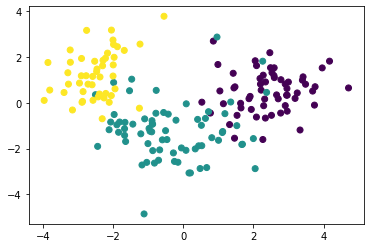

In [195]:
# 시각화
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = dataset.target)

In [196]:
# 데이터 설명(%)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.3400206  0.15239134]
0.49241194001543964


### 희소PCA

- 적절한 희소성을 유지 (alpha값으로 조정)
- 오버피팅 방지

In [197]:
# 라이브러리 불러오기
from sklearn.decomposition import SparsePCA

In [198]:
# 데이터 복사
df = data.copy()

In [199]:
# 희소 PCA
pca = SparsePCA(n_components = 2, alpha=0.01)

In [200]:
# 희소 PCA 변환
df = pca.fit_transform(df)

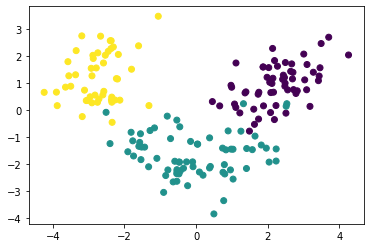

In [201]:
# 시각화
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = dataset.target)

### 커널PCA

- 비선형으로 차원축소

In [202]:
# 라이브러리 불러오기
from sklearn.decomposition import KernelPCA

In [203]:
# 데이터 복사
df = data.copy()

In [204]:
# 커널 PCA
pca = KernelPCA(n_components = 2)

In [205]:
# 커널 PCA 변환
df = pca.fit_transform(df)

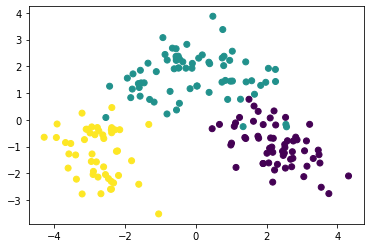

In [206]:
# 시각화
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = dataset.target)

### SVD(Singular Value DEcomposition) 특이값 분해

- 행렬을 특정한 구조로 분해하는 방식
- 신호 처리와 통계학 등의 분야에서 자주 사용됨

In [207]:
# 라이브러리 불러오기
from sklearn.decomposition import TruncatedSVD

In [208]:
# SVD적용
df = data.copy()
pca = TruncatedSVD(n_components = 2)
df = pca.fit_transform(df)

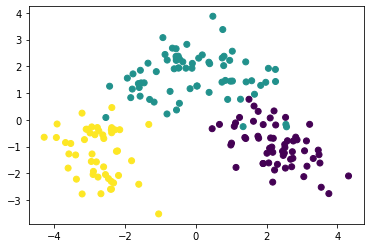

In [209]:
# 시각화
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = dataset.target)

## 군집 (Clustering)

- **군집분석은 `유사성이 높은 대상의 집단을 분류`하는 분석 방법**
- **계층적 군집분석과 비계층적 군집분석 으로 구분함**
    - **전통적인 계층적 군집분석은 군집의 개수를 나중에 선정함**
    - **비계층적 군집분석인 K-means는 군집의 수를 가장 먼저 선정함**
    - **K-mean 군집분석은 초기 중심 값은 임의로 선정하며, 중심 값이 이동함**

**군집분석의 평가지표**

- **Silhouette(실루엣), Dunn Index 등 활용**

### 비계층적 군집분석

- 대표적인 방법 K-means
- K-평균군집(centroid), 임의의 지점 K개를 선택해 해당 중심에서 가까운 데이터를 군집화 하는 기법
- n-clusters 하이퍼파라미터 반드시 설정

In [210]:
# KMeans 라이브러리
from sklearn.cluster import KMeans

In [211]:
# 데이터 불러오기
from sklearn.datasets import load_wine
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df = data.copy()

In [212]:
# Kmeans 선언 및 학습
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [213]:
# Kmeans 예측
pred = kmeans.predict(df)
pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2], dtype=int32)

In [214]:
# 실제값과 예측값 비교
df['target'] = dataset.target    #target 을 넣으면서 피쳐가 하나 더 늘어나서 pred 에서 오류가 발생함.(run all above로 해결)
df['pred'] = pred
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,pred
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,0


### PCA > 군집 > 시각화

In [217]:
# PCA
df = data.copy()
pca = PCA(n_components = 2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)

In [218]:
# Kmeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df)
pred = kmeans.predict(df)
df['kmeans'] = pred
df

,0,1,kmeans
0,318.562979,21.492131,1
1,303.097420,-5.364718,1
2,438.061133,-6.537309,1
3,733.240139,0.192729,1
4,-11.571428,18.489995,2
...,...,...,...
173,-6.980211,-4.541137,2
174,3.131605,2.335191,2
175,88.458074,18.776285,2
176,93.456242,18.670819,2


In [221]:
# 각 군집의 중심점
centers = kmeans.cluster_centers_

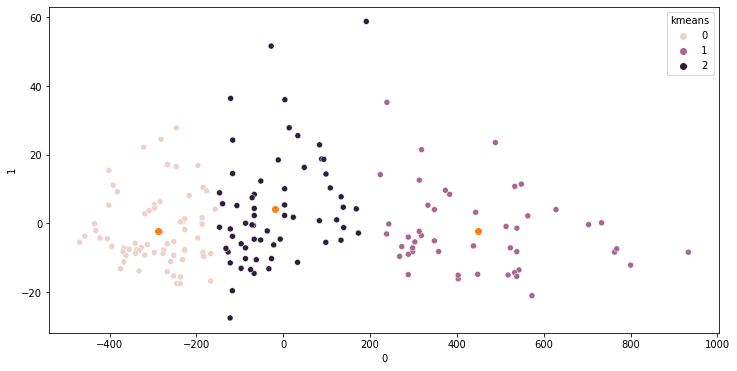

In [222]:
# 시각화
import seaborn as sns  # seaborn 라이브러리 임포트
plt.figure(figsize=(12, 6))
sns.scatterplot(x = df.iloc[:,0], y = df.iloc[:,1], hue = df['kmeans'])
plt.scatter(centers[:,0], centers[:,1])

### 클러스터 개수 찾는 방법 (엘보우 방법, elbow method)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklea

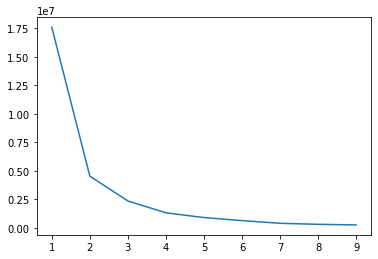

In [227]:
# 군집 수 찾기 (정확하게 몇개가 나오진 않지만, 시각화 시켜서 대충 요정도 군집이면 적절하다 파악할 수 있음)
inertia = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, random_state = 2022)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,10), inertia)

### 계층적 군집분석

- **대표적인 방법 덴드로그램**
- **k-means와 달리 군집 개수를 사전에 설정하지 않음**

In [229]:
# 덴드로그램
from scipy.cluster.hierarchy import dendrogram, ward

In [232]:
# PCA
df = data.copy()
pca = PCA(n_components = 2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)

In [238]:
# 샘플링
kdata = df[:3].copy()
kdata = kdata.append(df[70:73])
kdata = kdata.append(df[160:163])
kdata

,0,1
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
70,123.130138,1.059835
71,-337.104122,-7.623855
72,-275.096026,-7.753152
160,-227.068836,-7.618630
161,-66.755431,8.470290
162,-176.765098,9.473190


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [60.0, 60.0, 82.5, 82.5],
  [21.25, 21.25, 71.25, 71.25],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [105.0, 105.0, 123.75, 123.75],
  [155.0, 155.0, 165.0, 165.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [160.0, 160.0, 182.5, 182.5],
  [205.0, 205.0, 215.0, 215.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [232.5, 232.5, 262.5, 262.5],
  [210.0, 210.0, 247.5, 247.5],
  [171.25, 171.25, 228.75, 228.75],
  [114.375, 114.375, 200.0, 200.0],
  [46.25, 46.25, 157.1875, 157.1875],
  [305.0, 305.0, 315.0, 315.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [355.0, 355.0, 365.0, 365.0],
  [375.0, 375.0,

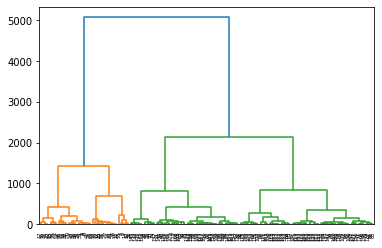

In [239]:
# 검증
linkage = ward(data)
dendrogram(linkage)